# UNLP Machine Learning - TP1
---------------------------------------
* **Autores:** 
    - Emiliano Bohorquez
    - Brayan A. Condori Luque
* **Objetivo:** Este notebook analiza los datos de forma descriptiva y predictiva.
---------------------------------------

**Fecha de Creación:** 2024-11-18

**Fecha de Actualización:** 2024-11-24

In [1]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Definimos las rutas de los archivos
DATASET_CLEAN = "../stores/clean_geih_data.csv"

In [ ]:
# Abrimos la base de datos
df_18 = pd.read_csv(DATASET_CLEAN, sep=",")
df_18

,directorio,secuencia_p,orden,formal,estrato1,sex,age,fweight,maxeduclevel,y_salary_m_hu,y_total_m,p6585s1,p6585s2,p6585s3,p6585s4
0,4514331,1,2,NaN,2.00,0.00,29.00,255.00,6.00,NaN,NaN,0,0,0,0
1,4514331,1,1,1.00,2.00,1.00,36.00,255.00,6.00,6740.74,1620833.25,1,0,1,0
2,4514332,1,1,NaN,2.00,0.00,32.00,429.00,5.00,NaN,NaN,0,0,0,0
3,4514332,1,2,NaN,2.00,1.00,35.00,429.00,6.00,NaN,NaN,0,0,0,0
4,4514333,1,4,NaN,2.00,1.00,18.00,194.00,7.00,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24492,4804453,1,9,0.00,3.00,1.00,23.00,233.00,7.00,NaN,200000.00,0,0,0,0
24493,4804454,1,1,1.00,2.00,1.00,27.00,387.00,6.00,3797.70,916119.69,0,1,1,0
24494,4804454,1,2,1.00,2.00,0.00,24.00,387.00,6.00,3000.00,1003666.69,0,0,1,0
24495,4804455,1,1,1.00,3.00,0.00,36.00,341.00,7.00,24500.00,6675000.00,0,0,0,0


### Seccion A: Análisis descriptivo

In [4]:
# La función summarize busca replicar el comando del mismo nombre que se utiliza en STATA.

def summarize(df, x, ponder):
    """
    Función que devuelve una tabla de estadísticas principales con ponderadores
    
    """
    mean_w = np.average(df[x], weights = df[ponder]) # Obtención de la media ponderada
    std_w = np.sqrt(
    np.average(
        (df[x] - np.average(df[x], weights=df[ponder]))**2,
        weights=df[ponder]
    ) * (len(df[x]) / (len(df[x]) - 1)) # Cálculo manual del desvío estandar ajustandolo por N-1 grados de libertad
)

    total_obs = df[ponder].sum() # Total de observaciones en función de la sumatoria de la columna del ponderador
    minimo = df[x].min() # El valor mínimo del conjunto de datos
    maximo = df[x].max() # El valor máximo del conjunto de datos
    return mean_w, std_w, total_obs, minimo, maximo

(nan, nan, 6057058.0, 151.909729003906, 291666.65625)


<Axes: xlabel='y_salary_m_hu', ylabel='Density'>

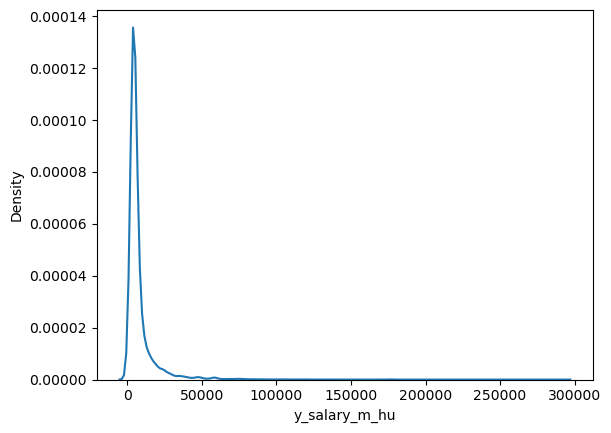

In [ ]:
# Total de la muestra: resumen respecto del ingreso total mensual
print(summarize(df_18, 'y_salary_m_hu', 'fweight'))

# Gráfico de densidad
sns.kdeplot(data=df_18, x='y_salary_m_hu')

(nan, nan, 2871039.0, 518.518493652344, 291666.65625)
(nan, nan, 3186019.0, 151.909729003906, 175000.0)


<Axes: xlabel='y_salary_m_hu', ylabel='Density'>

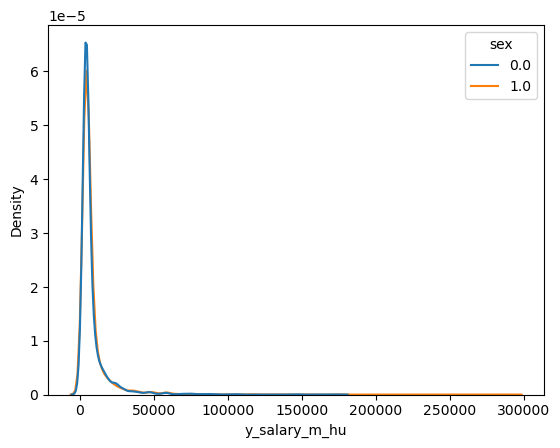

In [ ]:
# Distinción por género

df_18_v = df_18[df_18['sex']==1.0]
df_18_m = df_18[df_18['sex']==0.0]

print(summarize(df_18_v, 'y_salary_m_hu', 'fweight'))
print(summarize(df_18_m, 'y_salary_m_hu', 'fweight'))

# Gráfico de densidad
sns.kdeplot(data=df_18, x='y_salary_m_hu', hue="sex")

(nan, nan, 2400666.0, 151.909729003906, 291666.65625)
(nan, nan, 1702759.0, 326.666656494141, 136111.109375)


<Axes: xlabel='y_salary_m_hu', ylabel='Density'>

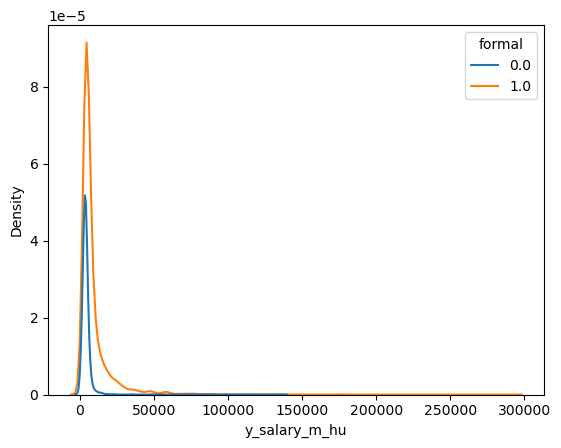

In [ ]:
# Distinción por formalidad

df_18_f = df_18[df_18['formal']==1.0]
df_18_i = df_18[df_18['formal']==0.0]


print(summarize(df_18_f, 'y_salary_m_hu', 'fweight'))
print(summarize(df_18_i, 'y_salary_m_hu', 'fweight'))

# Gráfico de densidad
sns.kdeplot(data=df_18, x='y_salary_m_hu', hue="formal")

<Axes: xlabel='y_salary_m_hu', ylabel='Density'>

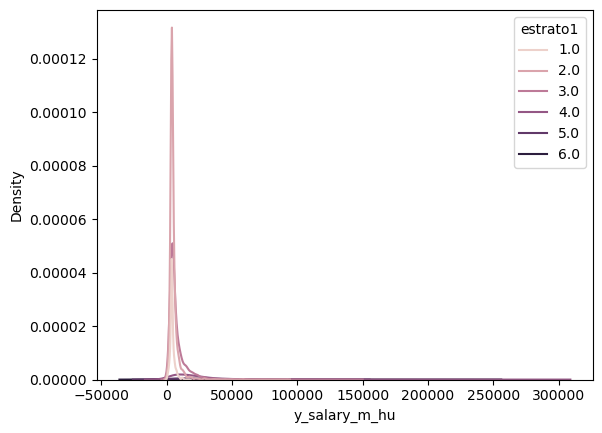

In [13]:
# Completamos los restantes gráficos para estrato y nivel educ
sns.kdeplot(data=df_18, x='y_salary_m_hu', hue="estrato1")


<Axes: xlabel='y_salary_m_hu', ylabel='Density'>

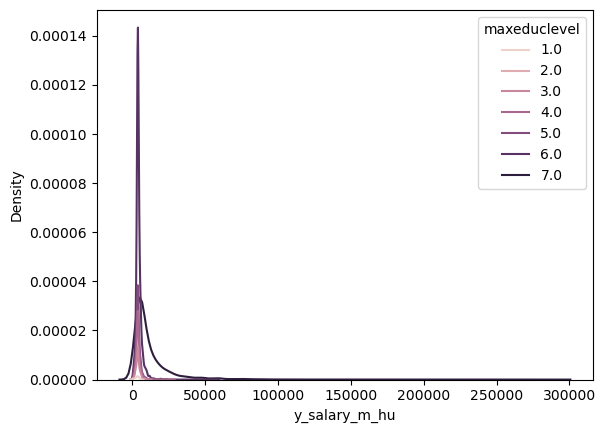

In [12]:
sns.kdeplot(data=df_18, x='y_salary_m_hu', hue="maxeduclevel")

#### Disclaimer - data cleaning

Dado que la distribución de ingresos laborales presenta una asimetría negativa, es decir, que los valores altos de salarios elevan la media, procedemos a generar una transformación de esta variable aplicando logaritmo natural. Además, se incorpora como variable si el individuo percibió algún tipo de subsidio. 

In [14]:
# Aplicación de logaritmo natural
df_18['ly_salary_m_hu'] = np.log(df_18['y_salary_m_hu'])

# Función pora verificar si percibió un subsidio.

def subsidio(x):
    if x['p6585s1'] == 1:
        return 1
    elif x['p6585s2'] == 1:
        return 1
    elif x['p6585s3'] == 1:
        return 1
    elif x['p6585s4'] == 1:
        return 1
    else:
        return 0
    
    
df_18['subsidio'] = df_18.apply(subsidio, axis=1)
df_18

,directorio,secuencia_p,orden,formal,estrato1,sex,age,fweight,maxeduclevel,y_salary_m_hu,y_total_m,p6585s1,p6585s2,p6585s3,p6585s4,ly_salary_m_hu,subsidio
0,4514331,1,2,NaN,2.00,0.00,29.00,255.00,6.00,NaN,NaN,0,0,0,0,NaN,0
1,4514331,1,1,1.00,2.00,1.00,36.00,255.00,6.00,6740.74,1620833.25,1,0,1,0,8.82,1
2,4514332,1,1,NaN,2.00,0.00,32.00,429.00,5.00,NaN,NaN,0,0,0,0,NaN,0
3,4514332,1,2,NaN,2.00,1.00,35.00,429.00,6.00,NaN,NaN,0,0,0,0,NaN,0
4,4514333,1,4,NaN,2.00,1.00,18.00,194.00,7.00,NaN,NaN,0,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24492,4804453,1,9,0.00,3.00,1.00,23.00,233.00,7.00,NaN,200000.00,0,0,0,0,NaN,0
24493,4804454,1,1,1.00,2.00,1.00,27.00,387.00,6.00,3797.70,916119.69,0,1,1,0,8.24,1
24494,4804454,1,2,1.00,2.00,0.00,24.00,387.00,6.00,3000.00,1003666.69,0,0,1,0,8.01,1
24495,4804455,1,1,1.00,3.00,0.00,36.00,341.00,7.00,24500.00,6675000.00,0,0,0,0,10.11,0


#### Disclaimer - análisis descriptivo

Dada la nueva variable logarítmica, realizamos el mismo análisis descriptivo que antes.

(nan, nan, 6057058.0, 5.023286456292669, 12.583366840957355)


<Axes: xlabel='ly_salary_m_hu', ylabel='Density'>

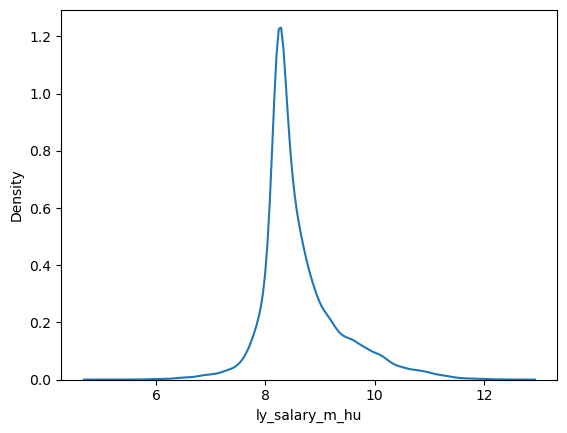

In [15]:
# Total de la muestra: resumen respecto del ingreso total mensual
print(summarize(df_18, 'ly_salary_m_hu', 'fweight'))

# Gráfico de densidad
sns.kdeplot(data=df_18, x='ly_salary_m_hu')

(nan, nan, 2871039.0, 6.250975694636872, 12.583366840957355)
(nan, nan, 3186019.0, 5.023286456292669, 12.072541252905651)


<Axes: xlabel='ly_salary_m_hu', ylabel='Density'>

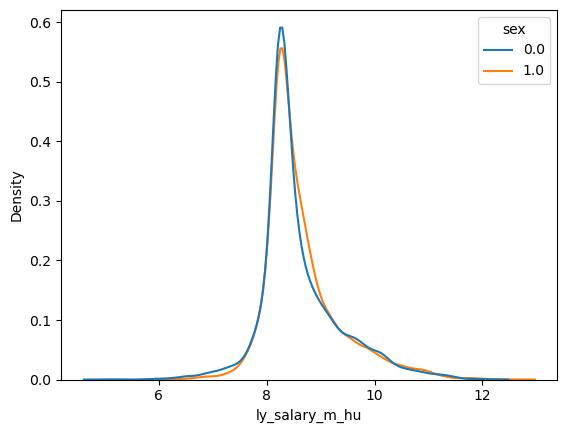

In [16]:
# Distinción por género
df_18_v = df_18[df_18['sex']==1.0]
df_18_m = df_18[df_18['sex']==0.0]

print(summarize(df_18_v, 'ly_salary_m_hu', 'fweight'))
print(summarize(df_18_m, 'ly_salary_m_hu', 'fweight'))

# Gráfico de densidad
sns.kdeplot(data=df_18, x='ly_salary_m_hu', hue="sex")

(nan, nan, 2400666.0, 5.023286456292669, 12.583366840957355)
(nan, nan, 1702759.0, 5.788940251856123, 11.821226811869643)


<Axes: xlabel='ly_salary_m_hu', ylabel='Density'>

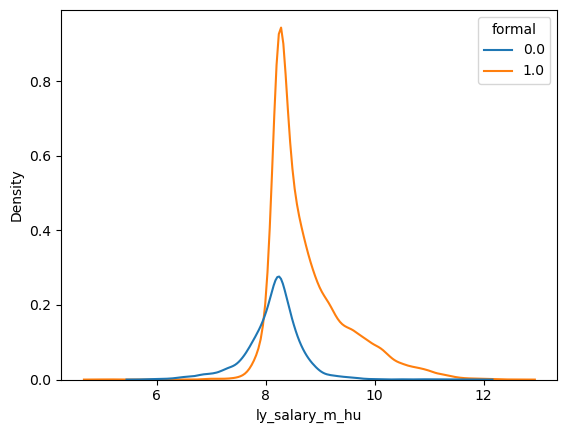

In [17]:
# Distinción por formalidad
df_18_f = df_18[df_18['formal']==1.0]
df_18_i = df_18[df_18['formal']==0.0]


print(summarize(df_18_f, 'ly_salary_m_hu', 'fweight'))
print(summarize(df_18_i, 'ly_salary_m_hu', 'fweight'))

# Gráfico de densidad
sns.kdeplot(data=df_18, x='ly_salary_m_hu', hue="formal")

(nan, nan, 1507231.0, 5.023286456292669, 12.29568480421986)
(nan, nan, 4549827.0, 5.788940251856123, 12.583366840957355)


<Axes: xlabel='ly_salary_m_hu', ylabel='Density'>

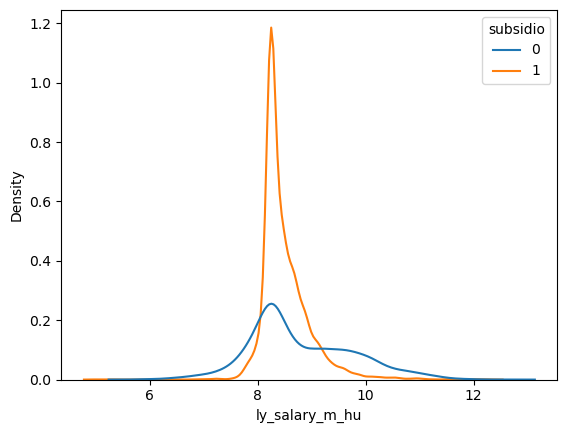

In [18]:
# Distinción por recepción de subsidio
df_18_f = df_18[df_18['subsidio']==1]
df_18_i = df_18[df_18['subsidio']==0]

print(summarize(df_18_f, 'ly_salary_m_hu', 'fweight'))
print(summarize(df_18_i, 'ly_salary_m_hu', 'fweight'))

# Gráfico de densidad
sns.kdeplot(data=df_18, x='ly_salary_m_hu', hue="subsidio")

<Axes: xlabel='ly_salary_m_hu', ylabel='Density'>

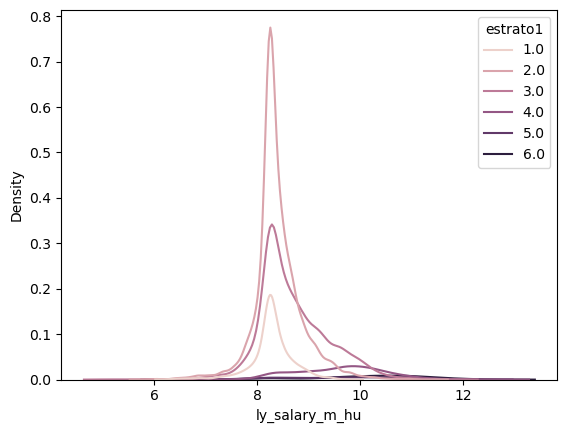

In [19]:
sns.kdeplot(data=df_18, x='ly_salary_m_hu', hue="estrato1")

<Axes: xlabel='ly_salary_m_hu', ylabel='Density'>

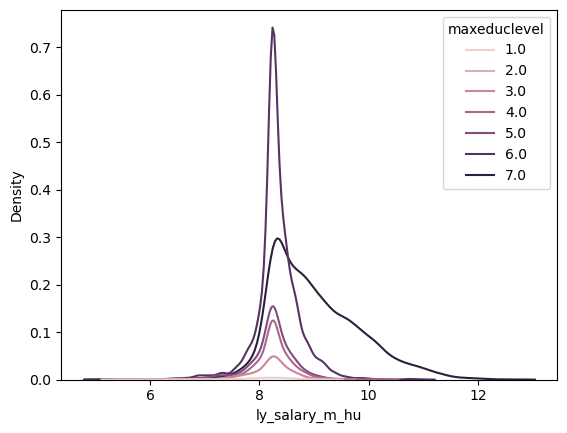

In [21]:
sns.kdeplot(data=df_18, x='ly_salary_m_hu', hue="maxeduclevel")

#### Sección B: Análisis predictivo

In [25]:
# Variables independientes para la predicción
X = df_18[['age', 'sex', 'formal', 'estrato1', 'maxeduclevel', 'subsidio']]  

# Variable dependiente
y = df_18[['y_salary_m_hu']]

# Dividimos los conjuntos X e Y en entrenamiento y testing.
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size=0.3,
                                        train_size=0.7,
                                        random_state = 123
                                    )

# Modelo de regresión
# Creamos una lista para almacenar las variables acumuladas
variables_acumuladas = []
resultados = []

# Iteramos sobre las columnas de X_train
for x in X_train.columns.values.tolist():
    # Agregamos la nueva variable al conjunto acumulado
    variables_acumuladas.append(x)
    
    # Filtramos las columnas acumuladas en X_train
    X_acumulado = X_train[variables_acumuladas]
    
    # Corremos el modelo de regresión
    reg = LinearRegression().fit(X_acumulado, y_train)
    
    # Realizamos un predict con el conjunto de entrenamiento
    y_train_pred = reg.predict(X_acumulado)
    
    # Realizamos una predicción con el conjunto de testing
    y_hat_model = reg.predict(X_test[variables_acumuladas])
    
    # Guardamos los coeficientes, el intercepto y el R^2 del modelo actual
    resultados.append({
        'variables': variables_acumuladas.copy(),
        'coeficientes': reg.coef_.tolist(),
        'intercepto': reg.intercept_,
        'score': reg.score(X_acumulado, y_train),
        'Y predicha': y_hat_model,
        "RMSE_training": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "RMSE_testing": np.sqrt(mean_squared_error(y_test, y_hat_model)),
        "Error": float(np.sqrt(mean_squared_error(y_test, y_hat_model))/np.mean(y_test))
    })

    
    
# Modelos polinómicos

for i in range(2,7):
    # Realizamos una transformación polinómica y corremos la regresión
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    reg =  LinearRegression().fit(X_train_poly,y_train)
    
    # Realizamos un predict con el conjunto de entrenamiento
    y_train_pred = reg.predict(X_train_poly)
    
    # Realizamos una transformación polinómica y luego la predicción con el conjunto de testing
    X_test_poly = poly.fit_transform(X_test[variables_acumuladas])
    y_hat_model = reg.predict(X_test_poly)
    
    # Guardamos los coeficientes, el intercepto y el R^2 del modelo actual
    resultados.append({
        'variables': variables_acumuladas.copy(),
        'coeficientes': reg.coef_.tolist(),
        'intercepto': reg.intercept_,
        'score': reg.score(X_train_poly, y_train),
        'Y predicha': y_hat_model,
        "RMSE_training": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "RMSE_testing": np.sqrt(mean_squared_error(y_test, y_hat_model)),
        "Error": float(np.sqrt(mean_squared_error(y_test, y_hat_model))/np.mean(y_test))
    })


# Mostramos los resultados de cada modelo
for i, modelo in enumerate(resultados, 1):
    print(f"Modelo {i}:")
    print(f"  Variables: {modelo['variables']}")
    print(f"  Coeficientes: {modelo['coeficientes']}")
    print(f"  Intercepto: {modelo['intercepto']}")
    print(f"  R²: {modelo['score']:.4f}")
    print("-" * 10)
    print(f"  RMSE (train): {modelo['RMSE_training']:.2f}")
    print(f"  RMSE (test): {modelo['RMSE_testing']:.2f}")
    print(f"  Error: {modelo['Error']:.2f}")
    print("-" * 40)

ValueError: Input y contains NaN.

In [ ]:
# Indicar número de modelo para x
x = 0
modelo = resultados[x]
modelo

In [ ]:
parametros = []
RMSE_train = []
RMSE_test = []

for i in range(0,11):
    for c in resultados[i]['coeficientes']:
        coeficientes = len(c)
        parametros.append(coeficientes)
    RMSE_train.append(resultados[i]['RMSE_training'])
    RMSE_test.append(resultados[i]['RMSE_testing'])

In [ ]:
print(parametros)

In [ ]:
graph = pd.DataFrame({
    'parametros': parametros,
    'Train set': RMSE_train,
    'Test set': RMSE_test
})

# Convertir a formato largo
graph_long = pd.melt(graph, id_vars=['parametros'], 
                  value_vars=['Train set', 'Test set'],
                  var_name='Set', value_name='RMSE')

plt.figure(figsize=(8, 6))
sns.lineplot(data=graph_long, x='parametros', y='RMSE', hue='Set', marker='o')

# Personalización
plt.title('Complejidad del modelo vs Error de predicción por conjunto', fontsize=14)
plt.xlabel('Cantidad de parámetros', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.legend(title='Set')
plt.tight_layout()
plt.show()

In [ ]:
graph

#### Anexo

In [ ]:
df_18.columns.values.tolist()

In [ ]:
df_18['maxEducLevel'].unique()

In [ ]:
df_18.columns.values

In [ ]:
# Variables independientes para la predicción
X = df_18[['age', 'sex', 'formal', 'estrato1', 'maxEducLevel', 'subsidio']]  

# Variable dependiente
y = df_18[['ly_salary_m_hu']]

# Dividimos los conjuntos X e Y en entrenamiento y testing.
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size=0.3,
                                        train_size=0.7,
                                        random_state = 123
                                    )

# Modelo de regresión
# Creamos una lista para almacenar las variables acumuladas
variables_acumuladas = []
resultados = []

# Iteramos sobre las columnas de X_train
for x in X_train.columns.values.tolist():
    # Agregamos la nueva variable al conjunto acumulado
    variables_acumuladas.append(x)
    
    # Filtramos las columnas acumuladas en X_train
    X_acumulado = X_train[variables_acumuladas]
    
    # Corremos el modelo de regresión
    reg = LinearRegression().fit(X_acumulado, y_train)
    
    # Realizamos una predicción con el conjunto de testing
    y_hat_model = reg.predict(X_test[variables_acumuladas])
    
    # Guardamos los coeficientes, el intercepto y el R^2 del modelo actual
    resultados.append({
        'variables': variables_acumuladas.copy(),
        'coeficientes': reg.coef_.tolist(),
        'intercepto': reg.intercept_,
        'score': reg.score(X_acumulado, y_train),
        'Y predicha': y_hat_model,
        "RMSE": np.sqrt(mean_squared_error(y_test, y_hat_model)),
        "Error": float(np.sqrt(mean_squared_error(y_test, y_hat_model))/np.mean(y_test))
    })

    
    
# Modelos polinómicos

for i in range(2,8):
    # Realizamos una transformación polinómica y corremos la regresión
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    reg =  LinearRegression().fit(X_train_poly,y_train)
    
    # Realizamos una transformación polinómica y luego la predicción con el conjunto de testing
    X_test_poly = poly.fit_transform(X_test[variables_acumuladas])
    y_hat_model = reg.predict(X_test_poly)
    
    # Guardamos los coeficientes, el intercepto y el R^2 del modelo actual
    resultados.append({
        'variables': variables_acumuladas.copy(),
        'coeficientes': reg.coef_.tolist(),
        'intercepto': reg.intercept_,
        'score': reg.score(X_train_poly, y_train),
        'Y predicha': y_hat_model,
        "RMSE": np.sqrt(mean_squared_error(y_test, y_hat_model)),
        "Error": float(np.sqrt(mean_squared_error(y_test, y_hat_model))/np.mean(y_test))
    })


# Mostramos los resultados de cada modelo
for i, modelo in enumerate(resultados, 1):
    print(f"Modelo {i}:")
    print(f"  Variables: {modelo['variables']}")
    print(f"  Coeficientes: {modelo['coeficientes']}")
    print(f"  Intercepto: {modelo['intercepto']}")
    print(f"  R²: {modelo['score']:.4f}")
    print("-" * 10)
    print(f"  RMSE: {modelo['RMSE']:.2f}")
    print(f"  Error: {modelo['Error']:.2f}")
    print("-" * 40)